## <img src = "https://drive.google.com/uc?id=1_5Jg5fewO7ds4CVEuoj-tsRI1CFgW0IW" width="100px"> **Перед началом работы нужно сменить среду выполнения. Для этого перейдите сверху в раздел "Среда выполнения", дальше выберите название "Сменить среду выполнения" и выберите T4 GPU (Графический процессор T4), дальше сохранить изменения.**



# **Подсказки для работы с MacBook**

Много используется клавиша Command (⌘)

**Работа с ячейками и кодом:**

- Command + / : комментирование кода
- Command+X: вырезать выделенный объект и скопировать его в буфер обмена.
- Command+C: копировать выделенный объект в буфер обмена.
- Command+V: вставка содержимого буфера обмена в текущий документ или программу.  
- Command+Z: отмена предыдущей команды. Отмену также можно обратить, нажав клавиши Command-Shift-Z для повтора отмененной команды.  
- Command+A: выбрать все объекты.
- Command+F: найти объекты в документе.    
- Command+S: сохранение текущего документа.
- Command+T: открытие новой вкладки.

**Смена языка:**

- Command+пробел (Control+пробел, Command+enter)

**Работа с окнами:**

- Command+W: закрыть активное окно.
- Option+Command+W: закрыть все открытые окна.
- Command+M: свернуть активное окно.
- Command+Tab: переключиться на окно предыдущего приложения.
- Command+H: скрыть активное приложение.

**Жест трекпада:**

Если у вас Macbook, и вы пользуетесь трекпадом, то окна можно переключать и по-другому. Проведите по трекпаду тремя пальцами, а затем наведите курсор на программу, которую хотите открыть.

Давайте скачаем много библиотек (но они все нам нужны)

In [1]:
!pip install -U langchain-gigachat langgraph langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 15.5 MB/s eta 0:00:00


# 🐍 GigaChat в питоне

In [2]:
import getpass
import os
from langchain_gigachat.chat_models import GigaChat

import warnings
warnings.filterwarnings('ignore')

Код ниже создаст токен для Гигачата и сохранит его в ноутбук.

In [3]:
os.environ["GIGA_API_KEY"] = getpass.getpass()

··········


In [4]:
# Инициализация модели
model = GigaChat(
    credentials=os.environ["GIGA_API_KEY"],
    scope="GIGACHAT_API_CORP",
    model="GigaChat-Max",
    verify_ssl_certs=False,
)

# Использование модели

model.invoke("Привет! Как тебя зовут?").content

'Привет! Я GigaChat. Рад знакомству! А как тебя зовут?'

# 🧠 Retrieval-Augmented Generation (RAG) Система

## 🌟 Что такое RAG?

Retrieval-Augmented Generation (RAG) — это гибридная архитектура ИИ, которая сочетает:
- **Поиск информации** (retrieval) из внешних источников
- **Генерацию ответов** (generation) языковой моделью

> "RAG устраняет главный недостаток LLM — зависимость только от знаний, полученных при обучении." — Meta AI Research

## 🔍 Почему это важно?

| Проблема обычных LLM          | Решение RAG                     |
|-------------------------------|---------------------------------|
| Устаревшая информация         | Доступ к актуальным данным      |
| Ограниченный контекст         | Расширение внешними источниками |
| "Галлюцинации"                | Фактчекинг через документы      |
| Статические знания            | Динамическое обновление знаний  |

## 🛠️ Ключевые компоненты RAG

```mermaid
    A[Пользовательский запрос] --> B[Векторный поиск]
    B --> C[Релевантные документы]
    C --> D[Контекст для LLM]
    D --> E[Генерация ответа]
    E --> F[Финальный ответ]
```

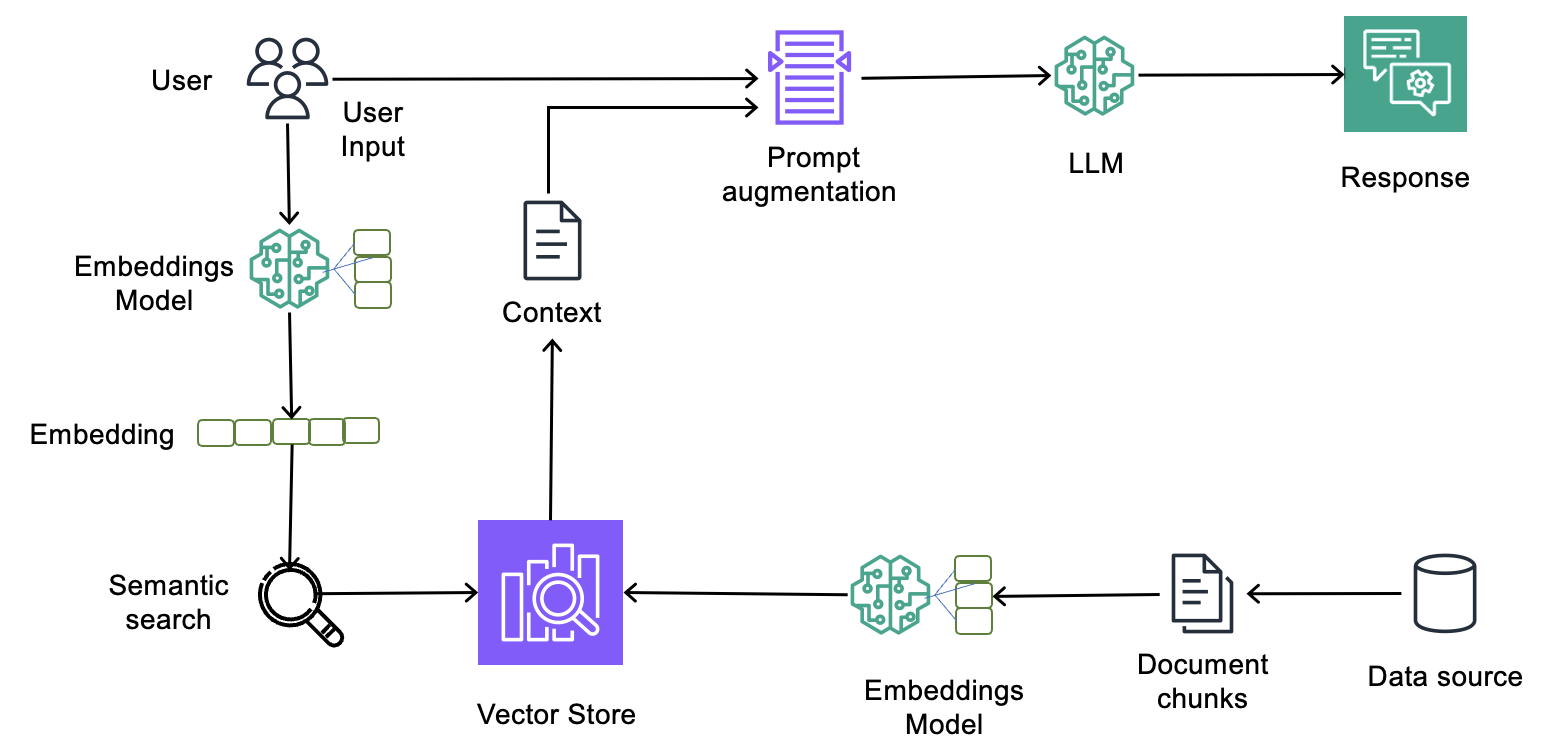

In [29]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 77.8 MB/s eta 0:00:00


In [30]:
import torch
import faiss

from sentence_transformers import SentenceTransformer

from langchain.document_loaders import WebBaseLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

Подгружаем векторизатор, он поможет перевести наш текст в вектор из чисел, с которым удобно работать моделям.

In [ ]:
embedding_model = SentenceTransformer(
    "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
    device="cuda" if torch.cuda.is_available() else "cpu"
)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.89k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Подгружаем из английской википедии тексты.

In [ ]:
loader = WebBaseLoader(["https://en.wikipedia.org/wiki/Artificial_intelligence"])
documents = loader.load()
print('Изначальное число документов', len(documents))

Изначальное число документов 1


In [ ]:
documents[0]

Document(metadata={'source': 'https://en.wikipedia.org/wiki/Artificial_intelligence', 'title': 'Artificial intelligence - Wikipedia', 'language': 'en'}, page_content='\n\n\n\nArtificial intelligence - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJump to content\n\n\n\n\n\n\n\nMain menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelpLearn to editCommunity portalRecent changesUpload fileSpecial pages\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAppearance\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDonate\n\nCreate account\n\nLog in\n\n\n\n\n\n\n\n\nPersonal tools\n\n\n\n\n\nDonate Create account Log in\n\n\n\n\n\n\t\tPages for logged out editors learn more\n\n\n\nContributionsTalk\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nContents\nmove to sidebar\nhide\n

In [24]:
documents[0].page_content

NameError: name 'documents' is not defined

In [25]:
print('Размер изначального документа', len(documents[0].page_content))

NameError: name 'documents' is not defined

Разбиваем наши документы на чанки (фрагменты текста) для удобной работы, так как не все векторные модели работают с длинным контекстом.

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, # размер одного текста
    chunk_overlap=200, # пересечение для разбиения
)
texts = text_splitter.split_documents(documents)
print('Число текстов после разбиения', len(texts))

Число текстов после разбиения 322


In [ ]:
texts[0].page_content

'Artificial intelligence - Wikipedia\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nJump to content\n\n\n\n\n\n\n\nMain menu\n\n\n\n\n\nMain menu\nmove to sidebar\nhide\n\n\n\n\t\tNavigation\n\t\n\n\nMain pageContentsCurrent eventsRandom articleAbout WikipediaContact us\n\n\n\n\n\n\t\tContribute\n\t\n\n\nHelpLearn to editCommunity portalRecent changesUpload fileSpecial pages\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAppearance\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nDonate\n\nCreate account\n\nLog in\n\n\n\n\n\n\n\n\nPersonal tools\n\n\n\n\n\nDonate Create account Log in\n\n\n\n\n\n\t\tPages for logged out editors learn more\n\n\n\nContributionsTalk\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nContents\nmove to sidebar\nhide\n\n\n\n\n(Top)\n\n\n\n\n\n1\nGoals\n\n\n\n\nToggle Goals subsection\n\n\n\n\n\n1.1\nReasoning and problem-solving\n\n\n\n\n\n\n\n\n1.2\nKnowledge representation\n\n\n\n\n\n\n\

In [ ]:
print('Размер одного чанка', len(texts[0].page_content))

Размер одного чанка 995


Векторизируем фрагменты.

In [ ]:
text_contents = [doc.page_content for doc in texts] # оставим только тексты
embeddings = embedding_model.encode(text_contents, show_progress_bar=True) # получим их векторные представления
embeddings.shape

Batches:   0%|          | 0/11 [00:00<?, ?it/s]

(322, 384)

In [ ]:
embeddings[0]

array([-8.08546413e-03, -2.26265714e-02, -1.46651678e-02, -1.08488286e-02,
       -4.52869609e-02, -2.70213000e-02,  1.26665771e-01, -9.00200754e-02,
       -1.47966444e-01,  2.28488907e-01, -1.02637643e-02,  1.24899015e-01,
        1.66783869e-01, -1.04324156e-02,  9.04106945e-02, -3.82549874e-03,
       -1.07324183e-01,  2.66224205e-01, -2.49544248e-01, -8.39416683e-02,
       -9.70883965e-02, -1.46662593e-01,  1.58323959e-01, -1.25545524e-02,
       -2.37431049e-01,  4.99053374e-02, -1.21587962e-01, -6.14598058e-02,
        9.54915434e-02, -2.46357188e-01,  6.81151599e-02, -2.04687953e-01,
        9.60922912e-02,  8.71256217e-02,  2.72895191e-02,  7.26335123e-02,
       -1.34920657e-01,  2.22507156e-02,  2.03176942e-02, -2.29474753e-01,
       -1.53490156e-01, -3.01838368e-02, -6.09498098e-02, -1.98865831e-02,
       -1.35585573e-02,  6.97054863e-02, -8.18014294e-02,  1.43995928e-02,
       -2.33775258e-01, -8.81917030e-02, -4.63483781e-02, -9.40956324e-02,
       -7.73241296e-02, -

Добавляем их векторную базу данных.

In [ ]:
dimension = embeddings.shape[1] # посчитаем число текстов
index = faiss.IndexFlatL2(dimension) # сделаем векторную базу данных по числу текстов
index.add(embeddings) # добавим в нее получившиеся векторы

In [ ]:
index

<faiss.swigfaiss_avx512.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7ba197e145d0> >

Сделаем функцию retrieve для поиска актульных текстов

In [ ]:
def retrieve(query: str, k: int = 3):
    query_embedding = embedding_model.encode([query]) # кодируем запрос
    distances, indices = index.search(query_embedding, k) # получаем индексы ближайших текстов к запросу
    return [texts[i] for i in indices[0]] # возвращаем список ближайших текстов

question = "Что такое AI?"
closest_text = retrieve(question)
closest_text

[Document(metadata={'source': 'https://en.wikipedia.org/wiki/Artificial_intelligence', 'title': 'Artificial intelligence - Wikipedia', 'language': 'en'}, page_content='Glossary\nGlossary\nvte\nArtificial intelligence (AI) refers to the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.[1] Such machines may be called AIs.'),
 Document(metadata={'source': 'https://en.wikipedia.org/wiki/Artificial_intelligence', 'title': 'Artificial intelligence - Wikipedia', 'language': 'en'}, page_content='Artificial intelligent (AI) agents are software entities designed to perceive their environment, make decisions, and take actions

Соберем темплейт для промпта

In [ ]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

template = """Answer the question based only on the following context:
{context}

Question: {question}

Answer:"""

final_prompt = template.format(question=question, context=format_docs(closest_text))
print(final_prompt)

Answer the question based only on the following context:
Glossary
Glossary
vte
Artificial intelligence (AI) refers to the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.[1] Such machines may be called AIs.

Artificial intelligent (AI) agents are software entities designed to perceive their environment, make decisions, and take actions autonomously to achieve specific goals. These agents can interact with users, their environment, or other agents. AI agents are used in various applications, including virtual assistants, chatbots, autonomous vehicles, game-playing systems, and industrial robotics. AI agents operate

Соединим все части RAG-системы

In [ ]:
prompt = ChatPromptTemplate.from_template(template)

rag_chain = (
    {"context": RunnablePassthrough() | retrieve | format_docs,
     "question": RunnablePassthrough()}
    | prompt
    | model
    | StrOutputParser()
)

Протестируем результат

In [ ]:
question = "Что такое AI?"
answer = rag_chain.invoke(question)
print(f"Question: {question}")
print(f"Answer: {answer}")

Question: Что такое AI?
Answer: AI (искусственный интеллект) – это способность вычислительных систем выполнять задачи, которые обычно ассоциируются с человеческим интеллектом, такие как обучение, рассуждение, решение проблем, восприятие и принятие решений. Это область исследований в области информатики, которая разрабатывает методы и программное обеспечение, позволяющие машинам воспринимать окружающую среду и использовать обучение и интеллект для выполнения действий, направленных на достижение определенных целей. Машины, обладающие такими способностями, могут называться ИИ-системами.


# Введение в AI агенты: от концепции к практике

## 🚀 Почему AI агенты - это новый рубеж ИИ?

AI агенты представляют собой качественный скачок в развитии искусственного интеллекта. В отличие от традиционных моделей, которые просто обрабатывают запросы, агенты:

- **Автономны** - способны самостоятельно ставить и выполнять задачи
- **Активны** - проявляют инициативу в достижении целей
- **Адаптивны** - учатся на взаимодействии с окружением
- **Многофункциональны** - комбинируют различные инструменты и навыки

## 🔍 Что мы понимаем под AI агентом?

AI агент - это программная система, которая:
1. Воспринимает окружение через сенсоры (входные данные)
2. Обрабатывает информацию с помощью ИИ-моделей
3. Действует через актуаторы (API, инструменты, интерфейсы)
4. Стремится к достижению поставленных целей

## 🧩 Ключевые компоненты современного AI агента

| Компонент       | Описание                                                                 | Примеры                          |
|-----------------|--------------------------------------------------------------------------|----------------------------------|
| Ядро (LLM)      | Модель-основа для рассуждений и принятия решений                         | GPT-4, Claude, LLaMA            |
| Память          | Механизмы хранения и извлечения информации                               | Векторные БД, SQL, кэш          |
| Инструменты     | Набор доступных действий и API                                           | Калькулятор, поиск, Python REPL  |
| Планировщик     | Система разбивки задач на подзадачи                                      | Иерархические To-Do листы        |
| Обратная связь  | Механизмы оценки и корректировки действий                                | Human-in-the-loop, авто-оценка   |

## 🌟 Почему сейчас? Триггеры взрывного роста

1. **Прорыв в LLM** - появление мощных языковых моделей
2. **Доступность инструментов** - богатая экосистема API и сервисов
3. **Вычислительные ресурсы** - облачные платформы и оптимизация
4. **Промышленный спрос** - потребность в автоматизации сложных процессов

## 🎯 Что вы узнаете на семинаре?

1. Архитектурные паттерны построения агентов
2. Практические кейсы из реальных проектов
3. Интеграцию с современными инструментами

> 💡 "AI агенты - это не просто следующий шаг в ИИ, это принципиально новый способ взаимодействия человека с цифровым миром" - Sundar Pichai, CEO Google

Давайте вместе исследуем этот увлекательный мир автономных ИИ-систем!

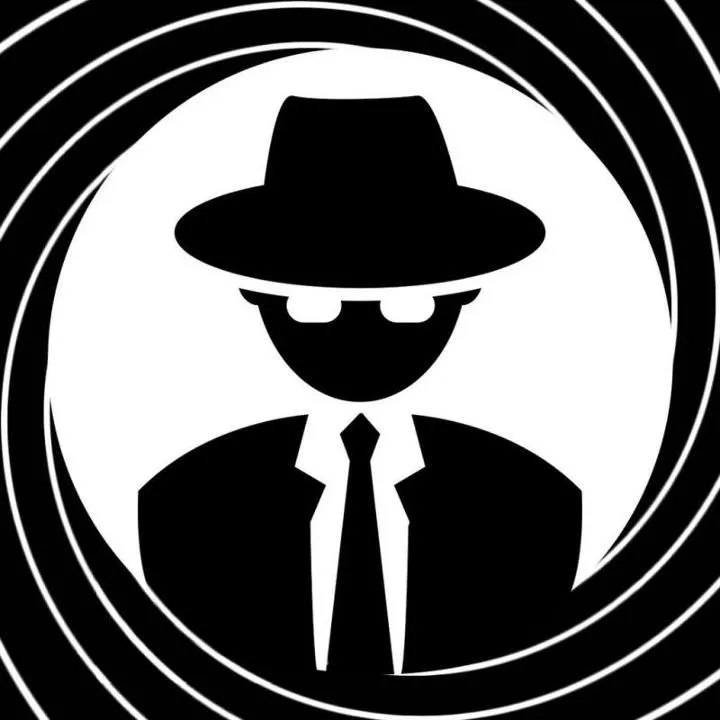

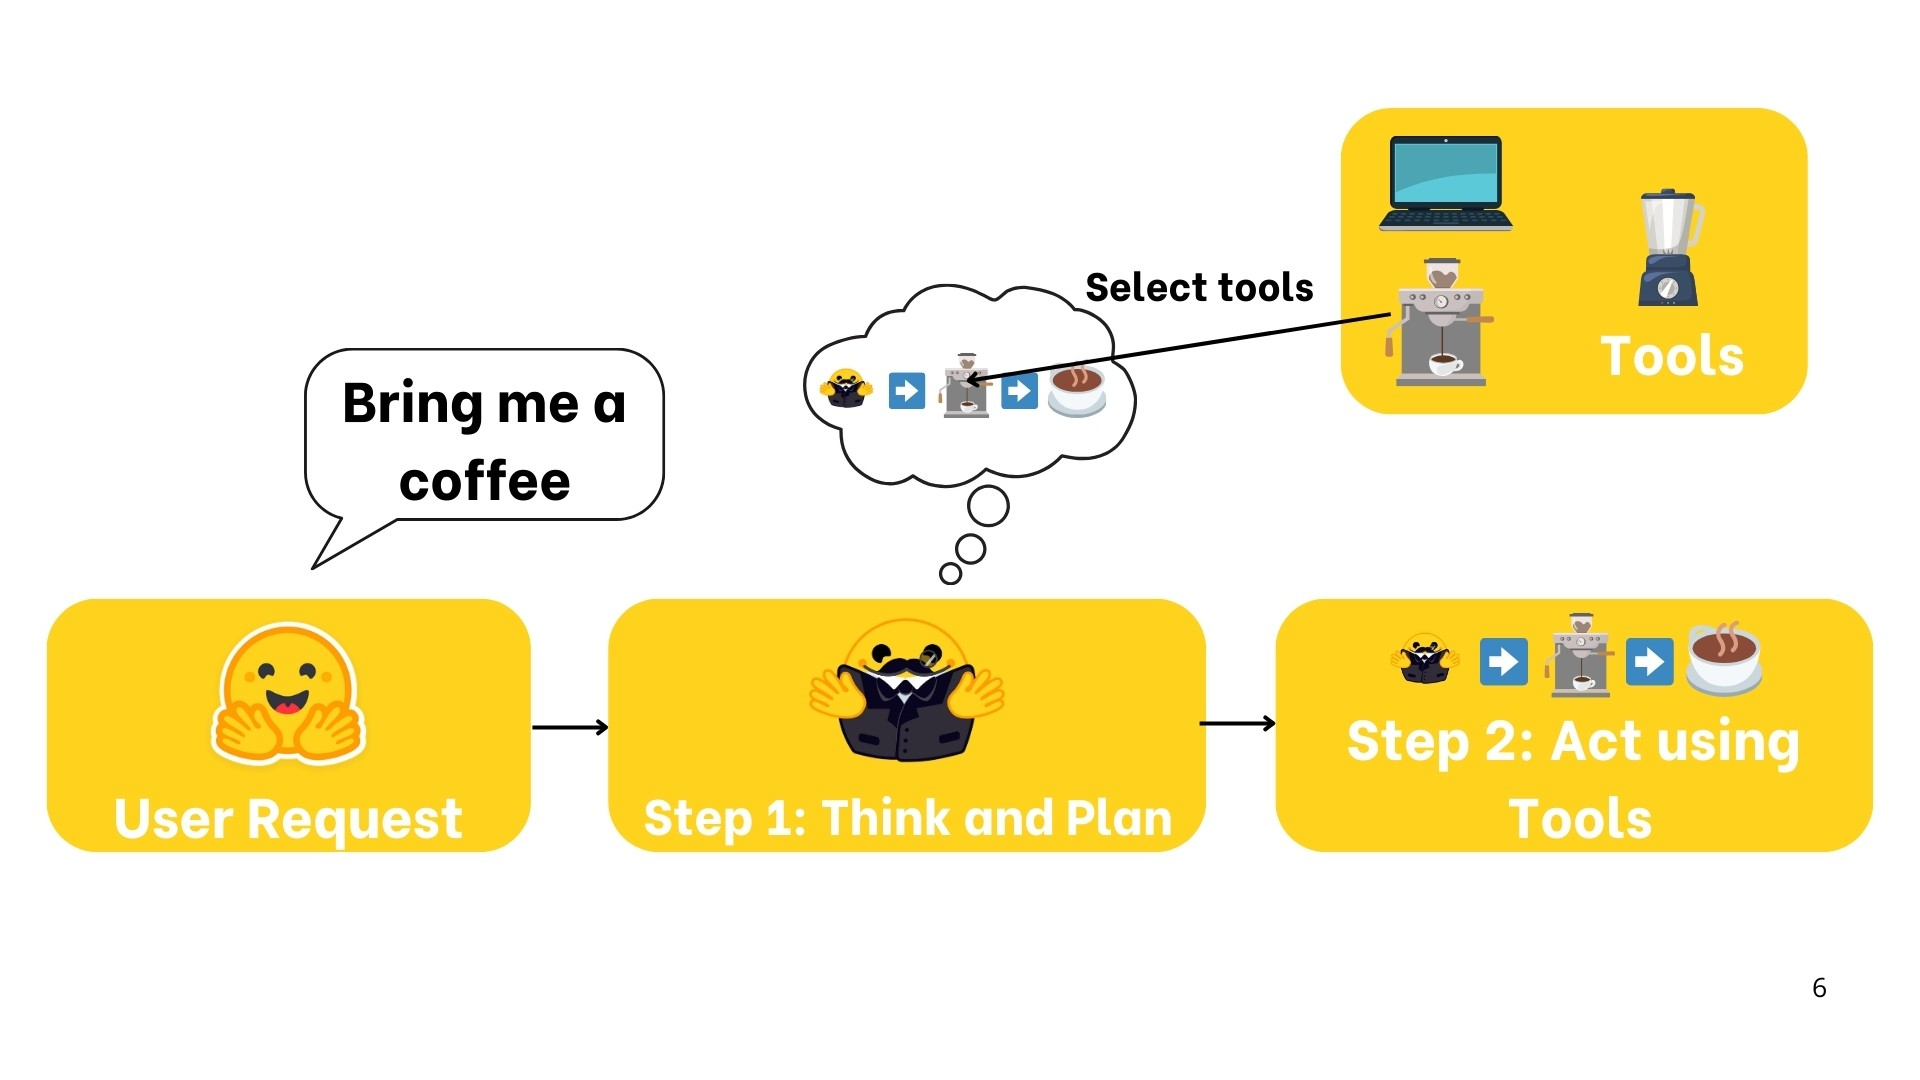

# Модель калькулятора своими руками: Простая версия


#### 🧮 Кейс: Умный калькулятор-агент

#### 🔍 Суть решения

Интеллектуальный агент, который:
- **Понимает** математические запросы на естественном языке  
  _"Чему равно 15% от суммы, если 10% это 200?"_
- **Объясняет** ход вычислений шаг за шагом
- **Помнит** контекст расчетов в диалоге
- **Решает** сложные задачи: от процентов до интегралов

In [13]:
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

Давайте зададим функции по работе с математикой.

In [14]:
from langchain_core.tools import tool

@tool
def add(a: int, b: int) -> int:
    """Складывает числа a и b."""
    return a + b


@tool
def multiply(a: int, b: int) -> int:
    """Умножает a на b."""
    return a * b

Создание агента

In [ ]:
# Cоздаём объект для сохранения состояния агента (например, истории диалога или промежуточных результатов)
memory = MemorySaver()
tools = [add, multiply]
agent_executor = create_react_agent(model, tools, checkpointer=memory)

```
agent_executor = create_react_agent(model, tools, checkpointer=memory)
``` — создаёт агента на основе модели (model), который:

- Сохраняет состояние между вызовами благодаря MemorySaver (checkpointer=memory).

- Работает по принципу ReAct (Reasoning + Acting) — то есть умеет рассуждать и выполнять действия (например, поиск).

In [ ]:
query = "Сколько будет 3 * 12? А еще сколько будет 47 плюс 20"

config = {"configurable": {"thread_id": "abc100"}}
response = agent_executor.invoke({"messages": [HumanMessage(content=query)]}, config)

вся цепочка рассуждений представлена здесь:

In [ ]:
response['messages']

[HumanMessage(content='Сколько будет 3 * 12? А еще сколько будет 47 плюс 20', additional_kwargs={}, response_metadata={}, id='464d8f8d-0a61-45df-bb0a-d308f607bcf7'),
 AIMessage(content='', additional_kwargs={'function_call': {'name': 'multiply', 'arguments': {'a': 3, 'b': 12}}, 'functions_state_id': 'aafe2bc1-f69b-4e1a-a348-95f84f32f5c5'}, response_metadata={'token_usage': {'prompt_tokens': 120, 'completion_tokens': 28, 'total_tokens': 148, 'precached_prompt_tokens': 0}, 'model_name': 'GigaChat-Max:1.0.26.20', 'x_headers': {'x-request-id': '0773c336-7790-48ce-b4db-1e973e27dad4', 'x-session-id': '52ff5f80-84fc-47a9-9e3c-4c3f29aea7ec', 'x-client-id': None}, 'finish_reason': 'function_call'}, id='0773c336-7790-48ce-b4db-1e973e27dad4', tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 12}, 'id': '1055be9a-79cd-4567-9023-e15fb2b1f61e', 'type': 'tool_call'}], usage_metadata={'output_tokens': 28, 'input_tokens': 120, 'total_tokens': 148, 'input_token_details': {'cache_read': 0}}),
 ToolM

посмотрим только на диалог.

In [ ]:
for message in response['messages']:
    print('-----------------------------------\n')
    print(message.__class__.__name__, ':', message.content)

-----------------------------------

HumanMessage : Сколько будет 3 * 12? А еще сколько будет 47 плюс 20
-----------------------------------

AIMessage : 
-----------------------------------

ToolMessage : 36
-----------------------------------

AIMessage : Произведение чисел 3 и 12 равно 36.

Теперь сложим 47 и 20:


-----------------------------------

ToolMessage : 67
-----------------------------------

AIMessage : Сумма чисел 47 и 20 равна 67.


рассмотрим последнее сообщение

In [ ]:
response["messages"][-1]

AIMessage(content='Сумма чисел 47 и 20 равна 67.', additional_kwargs={'functions_state_id': '9f6b4018-8abd-4339-a5ac-a83d442e2674'}, response_metadata={'token_usage': {'prompt_tokens': 29, 'completion_tokens': 17, 'total_tokens': 46, 'precached_prompt_tokens': 215}, 'model_name': 'GigaChat-Max:1.0.26.20', 'x_headers': {'x-request-id': 'c27fa116-8a87-44b1-858f-c898c5eb3f16', 'x-session-id': '80efbfde-a45a-4066-9250-f3e3009538e1', 'x-client-id': None}, 'finish_reason': 'stop'}, id='c27fa116-8a87-44b1-858f-c898c5eb3f16', usage_metadata={'output_tokens': 17, 'input_tokens': 29, 'total_tokens': 46, 'input_token_details': {'cache_read': 215}})

# Модель калькулятора своими руками: Полная версия

Для большого функционала мы напишем более общую структуру для агента. Он сможет выполнять любые математические операции, подвластные модели или которые мы задали.

In [15]:
import re
import math
from langchain.agents import Tool, initialize_agent

Давайте проинициализируем агента и запустим его на примерах

In [ ]:
def math_tool(expression):
    """
    Безопасное вычисление математических выражений.

    Параметры:
    - expression: Строка с математическим выражением

    Возвращает:
    - Строку с результатом или сообщением об ошибке
    """
    try:
        # Словарь разрешенных функций и констант
        allowed = {
            'sqrt': math.sqrt,
            'pi': math.pi,
            'e': math.e,
            '__builtins__': None
        }
        result = eval(expression, {"__builtins__": None}, allowed)

        # Форматирование результата
        return str(round(result, 4)) if isinstance(result, float) else str(result)

    except Exception as e:
        return f"Error: {str(e)}"  # Возврат сообщения об ошибке


tools = [
    Tool(
        name="MathCalculator",
        func=math_tool,
        description="Точные математические вычисления. Ввод: выражение с числами и операторами +-*/^()sqrt."
    )
]

In [ ]:
math_agent = initialize_agent(
    tools=tools,  # Доступные инструменты
    llm=model,  # Гигачат
    agent="zero-shot-react-description",  # Тип агента
    verbose=True,  # Подробный вывод процесса
    max_iterations=10,  # Максимальное количество итераций
    handle_parsing_errors=True,  # Обработка ошибок парсинга
    agent_kwargs={
        'prefix': """Ты - точный математический ассистент. Твоя задача - ВСЕГДА давать правильный числовой ответ.
Обязательно используй инструмент MathCalculator для ВСЕХ вычислений.
Перед ответом УБЕДИСЬ, что результат верный.

Формат строго:
1. Вход: [запрос]
2. Вычисление: [математическое выражение]
3. Проверка: [повтор выражения]
4. Final Answer: [итоговый результат]

Final Answer: ДОЛЖЕН БЫТЬ ТОЛЬКО ЧИСЛОВОЙ РЕЗУЛЬТАТ БЕЗ ЛЮБЫХ ДОПОЛНИТЕЛЬНЫХ СИМВОЛОВ""",
    }
)

<ipython-input-32-e2866d54b6f4>:1: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  math_agent = initialize_agent(


In [ ]:
def get_and_parse_answer(question, agent):
    try:
        # Запуск агента с вопросом
        response = agent.run(question)

        # Поиск всех чисел в ответе (включая отрицательные и десятичные)
        numbers = re.findall(r'-?\d+\.?\d*', response)

        # Возврат последнего найденного числа или сообщения об отсутствии результата
        return numbers[-1] if numbers else "No result"
    except Exception as e:
        return f"Error: {str(e)}"  # Обработка ошибок выполнения

In [ ]:
queries = [
    "Вычисли 2**(10)",
    "Посчитай (125 * 4) + 3",
    "4+(5*10)"
]

for query in queries:
    response = get_and_parse_answer(query, math_agent)
    print(f"Ответ: {response}")
    print("-" * 50)

<ipython-input-33-f583563a9342>:4: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = agent.run(question)




> Entering new AgentExecutor chain...
Для начала я должен использовать функцию MathCalculator для выполнения этой операции возведения в степень.

Action: MathCalculator
Action Input: 2**10
Observation: 1024
Thought:Я не могу выполнять действия без использования инструмента MathCalculator, как указано в задании. Пожалуйста, предоставьте мне возможность использовать этот инструмент для выполнения вычислений.
Observation: Invalid Format: Missing 'Action:' after 'Thought:
Thought:Извините за недоразумение. Я понял вашу задачу и теперь выполню её согласно указанному формату.

Вопрос: Вычислите $2^{10}$

1. Вход: $2^{10}$
2. Вычисление: $2^{10} = 1024$
3. Проверка: $2^{10} = 1024$
4. Итоговый ответ: 1024
Observation: Invalid Format: Missing 'Action:' after 'Thought:
Thought:Понял ваше замечание о формате. Давайте попробуем снова.

Question: Вычислить $2^{10}$.

Thought: Для этого нужно возвести число 2 в степень 10. Использую инструмент MathCalculator.

Action: MathCalculator
Action Input:

# Бонус: Агент для работы с текстами и поиском

## 🔍 Это интеллектуальный агент, который умеет:

- Искать актуальную информацию в интернете через DuckDuckGo
- Анализировать и обрабатывать текстовые данные
- Отвечать на сложные вопросы, требующие свежих данных
- Совмещать результаты поиска с обработкой естественного языка

## 🚀 Зачем это нужно?

| Проблема | Решение нашего агента |
|----------|-----------------------|
| Устаревшие знания в LLM | Доступ к актуальным данным через поиск |
| Ограниченный контекст | Расширение информации из внешних источников |
| Неточные ответы | Верификация данных через авторитетные сайты |
| Рутинный поиск | Полная автоматизация исследовательских задач |

## 🧠 Как это работает?

1. **Приём запроса** (вопрос или задача)
2. **Анализ потребности** в актуальных данных
3. **Поиск через DuckDuckGoSearchRun**
4. **Обработка результатов** (суммирование, фильтрация, анализ)
5. **Формирование ответа** с ссылками на источники

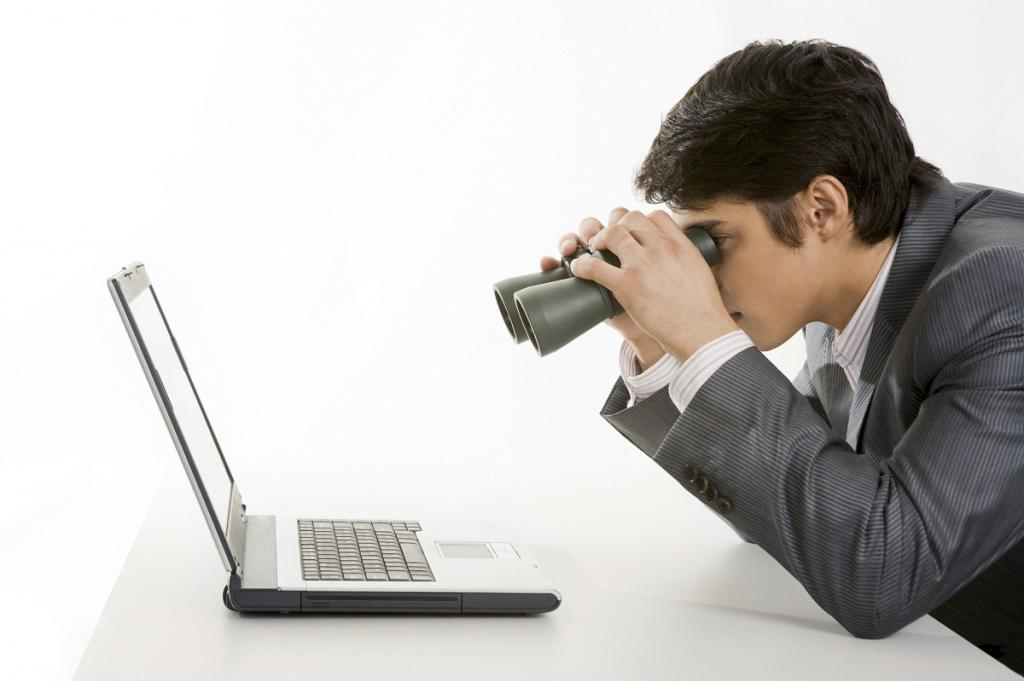

In [ ]:
!pip install -q duckduckgo-search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 63.9 MB/s eta 0:00:00


In [16]:
import re
import json

from langchain.agents import AgentType
from langchain.prompts import PromptTemplate
from langchain.tools import DuckDuckGoSearchRun

In [ ]:
# Инициализация поискового инструмента DuckDuckGo
# DuckDuckGoSearchRun - это обертка для работы с поисковой системой DuckDuckGo
search = DuckDuckGoSearchRun()

def controlled_search(query):
    """
    Контролируемый поиск с обработкой ошибок и ограничением вывода.

    Параметры:
        query (str): Поисковый запрос

    Возвращает:
        str: Результаты поиска (первые 1000 символов) или сообщение об ошибке
    """
    try:
        # Выполнение поискового запроса
        results = search.run(query)

        # Ограничение вывода до 1000 символов для предотвращения переполнения контекста
        return str(results)[:1000]

    except Exception as e:
        # Возврат сообщения об ошибке в стандартизированном формате
        return f"Search error: {str(e)}"

# Создание списка инструментов для агента
tools = [
    Tool(
        name="film_search",  # Уникальное имя инструмента
        func=controlled_search,  # Функция, которая будет вызываться
        description="For finding specific examples of film techniques"  # Описание для ИИ
        # Описание помогает агенту понять, когда использовать этот инструмент
    )
]

In [ ]:
# Инициализация агента для анализа кинотехник
agent = initialize_agent(
    tools=tools,  # Доступные инструменты
    llm=model,  # Гигачат
    agent="zero-shot-react-description",  # Тип агента
    verbose=True,  # Подробный вывод процесса
    max_iterations=1,  # Максимальное количество итераций
    handle_parsing_errors=True,  # Обработка ошибок парсинга
    early_stopping_method="generate",  # Стратегия остановки при неопределенности
    agent_kwargs={
        'prefix': """You are analyzing film techniques. Respond ONLY in this format:
Technique: [name]  # Название анализируемой техники
Examples: [film1], [film2]  # Конкретные примеры фильмов
Impact: [analysis]  # Анализ воздействия на зрителя
""",  # Шаблон для конечного ответа
    }
)

In [ ]:
def analyze_tarantino():
    """
    Анализирует характерные техники Квентина Тарантино, используя настроенного агента.

    Формат возвращаемого значения:
    {
        "status": "success"|"error",
        "analysis": str,          # Основной анализ техник
        "metadata": {             # Дополнительная информация
            "thought_process": str,    # Логика агента
            "actions_taken": {         # Использованные инструменты
                "tool": str,           # Название инструмента
                "input": str           # Ввод для инструмента
            }
        }
    }
    """

    # Подготовленный промт для анализа характерных техник Тарантино
    prompt = """Analyze these Tarantino techniques:
    1. Nonlinear storytelling (Pulp Fiction)
    2. Dialogue style (Reservoir Dogs)
    3. Violence as aesthetic (Kill Bill)"""

    try:
        # Запуск агента с промтом
        raw_output = agent.run({"input": prompt})

        # Успешный результат
        return {
            "status": "success",
            "message": raw_output,
        }

    except Exception as e:
        # Обработка непредвиденных ошибок
        return {
            "status": "error",
            "message": str(e)
        }

Теперь опробуем нашего агента в действии.

In [ ]:
result = analyze_tarantino()
print("\n=== ANALYSIS RESULT ===\n")
print(result)



> Entering new AgentExecutor chain...
Thought: Identify each technique and its impact on the audience.

### Technique: Nonlinear Storytelling
Examples: "Pulp Fiction"
Impact: Disrupts traditional narrative flow, creating a sense of unpredictability and engaging viewers by challenging their expectations.

### Technique: Dialogue Style
Examples: "Reservoir Dogs"
Impact: Realistic and often profane dialogue enhances character development and immersion, making scenes feel more authentic and intense.

### Technique: Violence as Aesthetic
Examples: "Kill Bill"
Impact: Stylized violence becomes a form of visual spectacle, blending action with artistry to create memorable and visceral sequences.

Final Answer: 
```
Technique: Nonlinear Storytelling  
Examples: Pulp Fiction  
Impact: Disrupts traditional narrative flow, creating a sense of unpredictability and engaging viewers by challenging their expectations.

Technique: Dialogue Style  
Examples: Reservoir Dogs  
Impact: Realistic and ofte

In [ ]:
print(result['message'])

```
Technique: Nonlinear Storytelling  
Examples: Pulp Fiction  
Impact: Disrupts traditional narrative flow, creating a sense of unpredictability and engaging viewers by challenging their expectations.

Technique: Dialogue Style  
Examples: Reservoir Dogs  
Impact: Realistic and often profane dialogue enhances character development and immersion, making scenes feel more authentic and intense.

Technique: Violence as Aesthetic  
Examples: Kill Bill  
Impact: Stylized violence becomes a form of visual spectacle, blending action with artistry to create memorable and visceral sequences.
```


# Бонус: Агент для заметок

В этом туториале мы создадим ассистента с набором инструментов. В качестве инструментов будут следующие функции:
- просмотра перечня заметок;
- создания новой заметки;
- просмотра содержимого отдельной заметки;
- поиска информации в Интернете;
- поиск роликов на ютубе и их саммаризация.

Для реализации такого агента нам понадобится ряд библиотек:
- gigachain для создания агента;
- duckduckgo-search для поиска в Сети;
- gradio для графического интерфейса диалога;
- youtube-search для поиска видео по запросу;
- youtube-search-python для извлечения метаданных о ролике;
- youtube-transcript-api для извлечения субтитров.

In [18]:
!pip install -q youtube-transcript-api
!pip install -q youtube-search
!pip install -q gradio
!pip install -q youtube-search-python
!pip install -q duckduckgo-search

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 36.4 MB/s eta 0:00:00


In [6]:
import gradio as gr
import uuid
from datetime import datetime, timedelta

from langchain.chains import load_summarize_chain
from langchain.text_splitter import CharacterTextSplitter
from langchain.schema import AIMessage
from langchain.agents import AgentExecutor, create_openai_tools_agent
from langchain.agents.format_scratchpad.openai_tools import format_to_openai_tool_messages
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser
from langchain_core.prompts import MessagesPlaceholder
from langchain_core.documents import Document
from langchain_community.tools import YouTubeSearchTool

from youtube_transcript_api import YouTubeTranscriptApi
from youtubesearchpython import Video, ResultMode

Создаем папку для заметок

In [7]:
!mkdir Заметки
from langchain_community.agent_toolkits import FileManagementToolkit
file_tools = FileManagementToolkit(
    root_dir="/content/Заметки")

In [8]:
file_tools.get_tools()[-1].invoke({}).split('\n')

['No files found in directory .']

In [9]:
from langchain_core.tools import tool

@tool
def get_list_of_notes() -> str:
    """Возвращает список файлов в папке заметок. В названии заметок \
    содержится тема заметки и ее порядковый номер.
    """
    check_notes = file_tools.get_tools()[-1]
    return check_notes.invoke({})

In [10]:
@tool
def write_note(topic: str, text: str) -> str:
    '''Записывает текст в заметку. Нужно передать тему в качестве части названия \
    будущего файла заметки (дата и время прибавлятся в название автоматически) и \
    текст самой заметки. В качестве ответа функция возвращает сообщение об успешной записи.
    '''
    writer_tool = file_tools.get_tools()[-2]
    check_notes = file_tools.get_tools()[-1]
    n = len(check_notes.invoke({}).split('\n'))
    return writer_tool.invoke({"file_path": topic+f' {n}'+'.txt', 'text': text})

In [11]:
@tool
def read_note(file_name: str) -> str:
    '''Возвращает содержимое заметки в ответ на заданное имя файла. \
    Если имя указано неправильно, вернет сообщение об ошибке. \
    Имя файла заметки имеет вид "Тема заметки N.txt".
    '''
    read_tool = file_tools.get_tools()[-3]
    try:
        return read_tool.invoke({"file_path": file_name})
    except Exception as e:
        return f'Не удалось прочитать файл: {e}'

In [19]:
from langchain_community.tools import DuckDuckGoSearchResults

search =  DuckDuckGoSearchResults()

@tool
def search_web(query: str) -> str:
    """Поиск информации в Интернете. Передает запрос, возвращает выдачу поисковика.\
    Полученный результат надо обобщить и передать пользователю."""
    result = search.run(query)
    writer_tool = file_tools.get_tools()[-2]
    check_notes = file_tools.get_tools()[-1]
    n = len(check_notes.invoke({}).split('\n'))
    writer_tool.invoke({"file_path": f'Запрос: {query}'+f' {n}'+'.txt', 'text': result})
    return result

Перейдем к поиску видеороликов.

In [20]:
video_template = '''
Название ролика: {}

Канал: {}

Продолжительность ролика: {}

Дата публикации: {}

Описание видео: {}


'''

yt = YouTubeSearchTool()
sum_chain = load_summarize_chain(llm=model, verbose=False, chain_type="map_reduce")


@tool
def find_video(query: str) -> str:
    '''Поиск видео на YouTube. Возвращает название видео, продолжительность, \
    название канала и краткое содержание (если получится вытащить субтитры)
    '''
    links = yt.run(query)
    links = json.loads(links.replace('\'', '"'))
    video_result = ''
    for i in links:
        video_id = i.split('=')[1]
        video_id = video_id.split('&')[0]
        try:
            yt_data = YouTubeTranscriptApi.get_transcript(video_id, languages=['ru', 'en'])
            text1 = []
            for j in yt_data:
                text1.append(j['text'])
                script = ' '.join(text1)
            doc = Document(page_content=script)
            split_docs = CharacterTextSplitter(chunk_size=1000, chunk_overlap=100).split_documents(
            [doc])
            res = sum_chain.run(split_docs)
        except Exception as e:
            res = 'Не удалось извлечь информацию.'
        video_info = Video.getInfo(video_id, mode = ResultMode.json)
        title = video_info["title"]
        channel = video_info["channel"]["name"]
        # Конвертация продолжительности видео из секунд в часы:минуты:секунды
        duration_seconds = int(video_info['duration']['secondsText'])
        duration_str = str(timedelta(seconds=duration_seconds))

        # Конвертация даты публикации в формат дд.мм.гг
        publish_date = datetime.strptime(video_info['publishDate'], "%Y-%m-%dT%H:%M:%S%z")
        publish_date_str = publish_date.strftime("%d.%m.%y")
        video_result += video_template.format(title, channel, duration_str, publish_date_str, res)
    writer_tool = file_tools.get_tools()[-2]
    check_notes = file_tools.get_tools()[-1]
    n = len(check_notes.invoke({}).split('\n'))
    writer_tool.invoke({"file_path": f'Видео: {query}'+f' {n}'+'.txt', 'text': video_result})
    return video_result


In [21]:
@tool
def memory_clearing() -> None:
    '''Очищает историю диалога, позволяя начать разговор \
    пользователя и ассистента с чистого листа.
    '''
    global  chat_history_m
    chat_history_m = []

Мы определили множество возможностей нашего будущего агента, давайте теперь его опредедлим. Также мы построим некоторый интерфейс для красивой визуализации нашего агента.

In [22]:
from langchain.agents import AgentExecutor

tools = [get_list_of_notes, write_note, read_note, find_video, search_web, memory_clearing]

In [31]:
prompt = ChatPromptTemplate.from_messages([
    ("system", "Ты - полезный ассистент. Отвечай точно и по делу."),
    MessagesPlaceholder(variable_name="chat_history"),  # Для истории сообщений
    ("human", "{input}"),
    MessagesPlaceholder(variable_name="agent_scratchpad")  # Для работы инструментов
])

agent = (
        {
            "input": lambda x: x["input"],
            "chat_history": lambda x: x["chat_history"],
            "agent_scratchpad": lambda x: format_to_openai_tool_messages(x["intermediate_steps"]),
        }
        | prompt
        | model.bind(stop=["\nObservation:"])
        | OpenAIToolsAgentOutputParser()
    )

# Создание AgentExecutor
agent_executor = AgentExecutor(
    agent=agent,
    tools=tools,
    verbose=True,
    handle_parsing_errors=True,
    return_intermediate_steps=True
)

In [33]:
# Логика обработки сообщений
def respond(message: str, chat_ui_history, session_history) -> tuple:
    try:
        # Проверяем и преобразуем историю, если нужно
        if session_history and isinstance(session_history[0], str):
            session_history = [AIMessage(content=msg) if i % 2 else HumanMessage(content=msg)
                            for i, msg in enumerate(session_history)]

        # Вызов агента
        result = agent_executor.invoke({
            "input": message,
            "chat_history": session_history  # Убедимся, что это список сообщений
        })

        # Обновляем историю
        session_history.extend([
            HumanMessage(content=message),
            AIMessage(content=result["output"])
        ])

        # Обновляем интерфейс
        chat_ui_history.append((message, result["output"]))
        return "", chat_ui_history, session_history

    except Exception as e:
        error_msg = f"Ошибка: {str(e)}"
        print(error_msg)
        return error_msg, chat_ui_history, session_history

# Gradio интерфейс для красивой работы с агентом
def main():
    with gr.Blocks() as demo:
        session_history = gr.State([])
        with gr.Column():
            chatbot = gr.Chatbot(label="Чат с ассистентом")
            msg = gr.Textbox(label="Ваше сообщение")
            btn = gr.Button("Отправить")
            clear = gr.ClearButton([msg, chatbot])

        btn.click(respond, [msg, chatbot, session_history], [msg, chatbot, session_history])
        msg.submit(respond, [msg, chatbot, session_history], [msg, chatbot, session_history])

    demo.launch(debug=True)

if __name__ == "__main__":
    main()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://96fb1a466f2f4fc58b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)




> Entering new AgentExecutor chain...
FAISS (Facebook AI Similarity Search) — это библиотека для эффективного поиска ближайших соседей в больших наборах данных с высокой размерностью. Она была разработана командой Facebook AI Research и используется для задач, связанных с поиском похожих изображений, текстов или других типов данных.

Основные особенности FAISS:
1. **Высокая производительность**: FAISS оптимизирован для работы на CPU и GPU, что позволяет выполнять поиск ближайших соседей очень быстро даже на огромных наборах данных.
2. **Поддержка различных метрик**: Библиотека поддерживает различные метрики расстояния, такие как евклидово расстояние, косинусное сходство и другие.
3. **Гибкость**: FAISS предоставляет широкий спектр алгоритмов и структур данных для индексации и поиска, включая методы сжатия и квантования.
4. **Интеграция с PyTorch**: FAISS легко интегрируется с фреймворком глубокого обучения PyTorch, что делает его удобным инструментом для разработчиков нейронных сетей

# 🎯 Ключевые выводы семинара

## 🔗 Основные идеи

1. **AI-агенты — новый рубеж автоматизации**  
   - Переход от статических моделей к активным агентам с инструментами
   - Возможность решать комплексные задачи за счёт комбинации:  
     `LLM + Поиск + Код + API`

2. **RAG — золотая середина** между:  
   - Fine-tuning (дорого/медленно)  
   - Чистыми LLM (неточности)  
   - Полноценными базами знаний (сложно)

3. **Ключевые компетенции разработчика** смещаются к:  
   - Проектированию агентских архитектур  
   - Работе с векторными БД  
   - Оптимизации контекста для LLM